# Analysis of Indian Product Reviews on Amazon

In [2]:

import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\saumy\Desktop\Hotel recommender project\Amazon reviews dataset\amazon_vfl_reviews.csv")
#asin : Amazon Standard Identification Number - a unique number for every product
#name : Name of the product
#date : Date on which review was posted
#rating : Rating given to the product ( out of 5 )
#review : Review given to the product

In [3]:
df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [4]:
df.shape

(2782, 5)

In [7]:
df.isna().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [11]:
df.shape

(2778, 5)

In [13]:
df.name.nunique() #We have a total of 122 unique products in our dataset

122

In [14]:
df['name'].sample(n=3)

2230                               Tata-Tea-Gold-500g
1570           NutriChoice-Digestives-grain-Pack-200g
2388    Fastrack-Casual-Analog-White-Watch-NK3121SM01
Name: name, dtype: object

#### We can observe a pattern in the product name using which we can extract the brand name i.e the first name

In [15]:
def get_brand(x):
    return x.split('-')[0]
df['brand'] = df['name'].apply(get_brand)

In [17]:
df.brand.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

##### We can see that there is some inconsistency in the brand names. PATANJALI and Patanjali are the same and same applies to MYSORE and Mysore. We will remove this incosistency.

In [18]:
df['brand'] = df['brand'].str.replace('PATANJALI', 'Patanjali')
df['brand'] = df['brand'].str.replace('MYSORE', 'Mysore')

In [19]:
df.brand.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'Dettol', 'Savlon', 'Cinthol', 'Britannia', 'NutriChoice',
       'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack', 'Reflex',
       'Mysore'], dtype=object)

In [20]:
df.brand.nunique()

24

In [30]:
import matplotlib.pyplot as plt

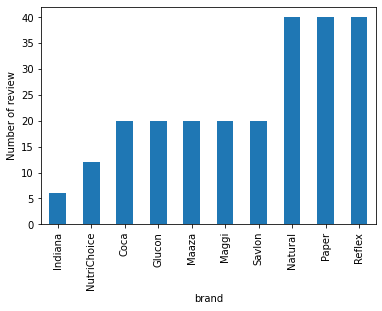

In [42]:
import matplotlib.pyplot as plt

def create_histogram_pandas_top10(df, x_col, y_col):
    top_10_brands = df.groupby(x_col)[y_col].count().nsmallest(10)
    top_10_brands.plot(kind='bar')
    plt.xlabel(x_col)
    plt.ylabel("Number of " + y_col)
    plt.show()

# Example usage:
create_histogram_pandas_top10(df, "brand", "review")


In [41]:
df.groupby('brand')['review'].count().sort_values()

brand
Indiana          6
NutriChoice     12
Maggi           20
Savlon          20
Coca            20
Glucon          20
Maaza           20
Reflex          40
Paper           40
Natural         40
Britannia      120
Fastrack       160
Amul           164
Patanjali      172
Tata           180
Dettol         180
Society        182
Streax         188
Mysore         194
Himalaya       200
Godrej         200
Cinthol        200
Mamaearth      200
Titan          200
Name: review, dtype: int64

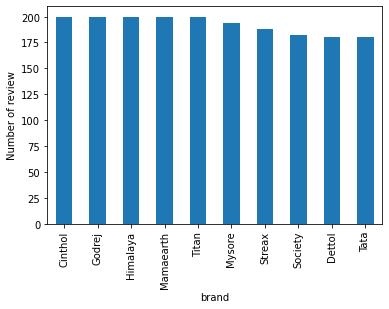

In [44]:
def create_histogram_maxtop10(df, x_col, y_col):
    top_10_brands = df.groupby(x_col)[y_col].count().nlargest(10)
    top_10_brands.plot(kind='bar')
    plt.xlabel(x_col)
    plt.ylabel("Number of " + y_col)
    plt.show()

# Example usage:
create_histogram_maxtop10(df, "brand", "review")

In [45]:
df.groupby('brand')['review'].count().sort_values(ascending=False)

brand
Mamaearth      200
Godrej         200
Himalaya       200
Titan          200
Cinthol        200
Mysore         194
Streax         188
Society        182
Dettol         180
Tata           180
Patanjali      172
Amul           164
Fastrack       160
Britannia      120
Paper           40
Reflex          40
Natural         40
Maggi           20
Maaza           20
Savlon          20
Coca            20
Glucon          20
NutriChoice     12
Indiana          6
Name: review, dtype: int64

In [46]:
from wordcloud import WordCloud

def create_wordcloud(df):
    # concatenate all the reviews into one long string
    all_reviews = " ".join(review for review in df.review)
    # create a wordcloud object
    wordcloud = WordCloud().generate(all_reviews)
    # plot the wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
from wordcloud import WordCloud

def create_wordcloud(df):
    # concatenate all the reviews into one long string
    all_reviews = " ".join(review for review in df.review)
    # create a wordcloud object
    wordcloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(all_reviews)
    # plot the wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


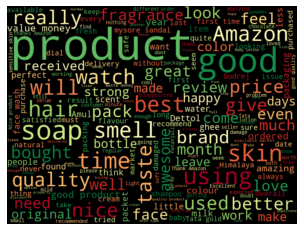

In [51]:
create_wordcloud(df)

### Distribution of ratings

In [56]:
def create_bar_plot(df):
    # group the data by rating and count the number of occurrences for each rating
    rating_count = df.groupby('rating')['rating'].count()
    # plot the data as a bar chart
    rating_count.plot(kind='bar')
    # set the x and y labels
    plt.xlabel('Rating')
    plt.ylabel('Count')
    # show the plot
    plt.show()

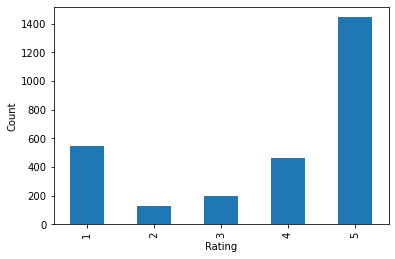

In [57]:
create_bar_plot(df)

### Sentiment analysis

In [59]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [90]:
from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score'] = df['review'].\
   apply(lambda x : polarity(x))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity'] = df['polarity_score'].\
   map(lambda x: sentiment(x))

In [91]:
fig = go.Figure(data=[go.Pie(labels=df['polarity'].value_counts().index.tolist(),
                             values=df['polarity'].value_counts().tolist(),
                            marker=dict(colors=['#006400','#8B0000','#add8e6']))])

fig.update_layout(title_text='Proportion of Sentiments',title_x=0.5,
                  template='plotly_dark')
fig.show()